<a href="https://colab.research.google.com/github/aaaraafaat/ML--Learning_Base/blob/main/Digit_Classification_using_K_Nearest_Neighbors_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification using K-Nearest Neighbors (KNN)

KNN-Based Handwritten Digit RecognitionDesign and implement a K-Nearest Neighbors (KNN) classification model to accurately classify handwritten digits (0-9) using the Digits dataset available in the scikit-learn library. Analyze the impact of the hyperparameter $K$ (number of neighbors) on the model's performance.

### Part 1: Load and Inspect Data
Load the Digits dataset from sklearn.datasets. Separate the data (images) from the target (labels). Check the shape of the data and print a sample image and its label.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [3]:
df=df/16
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,...,0.3125,0.0,0.0,0.0000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,...,0.5625,0.0,0.0,0.0000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.2500,0.0,0.0,0.0000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0
1793,0.0,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.0000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0
1794,0.0,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.0000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0
1795,0.0,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.0000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0


In [4]:
df['target']=digits.target
df


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,...,0.0,0.0,0.0000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.0,0.0,0.0000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0,9
1793,0.0,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0,0
1794,0.0,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0,8
1795,0.0,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0,9


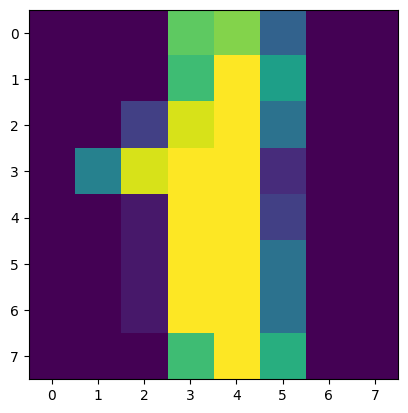

In [5]:
plt.imshow(digits.images[1])

Part 2: Preprocessing and Splitting

Normalize the data (optional but recommended for distance-based algorithms like KNN) and split the dataset into training and testing sets (e.g., 80% train, 20% test).

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2)

## Part 3: Model Training and Evaluation ($K=5$)

Instantiate a KNN classifier with the default or a fixed number of neighbors (e.g., $K=5$). Train the model on the training data and evaluate its performance on the test set.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
predict = model.predict(x_test)
print(predict)

[4 2 2 3 7 4 7 4 5 2 8 3 6 2 4 8 2 1 5 8 7 7 2 5 6 6 4 5 7 6 0 4 3 5 7 6 8
 7 6 7 2 0 4 9 8 1 1 5 0 1 9 9 8 7 8 9 1 7 2 3 8 9 6 6 9 5 7 6 8 9 7 8 9 3
 6 5 1 2 3 6 7 2 7 3 6 3 2 8 1 8 9 2 4 9 9 5 7 5 9 5 7 5 5 4 8 1 0 7 0 5 6
 5 5 4 9 3 7 3 6 6 5 0 7 0 7 9 6 9 9 1 0 2 0 1 0 1 8 7 6 8 0 8 7 9 1 2 8 8
 1 1 6 2 1 1 6 5 2 3 9 5 0 6 7 0 9 6 2 9 2 3 8 1 6 6 8 7 4 5 2 7 9 2 9 8 4
 4 9 4 3 8 4 7 5 2 4 1 3 0 9 5 7 8 2 2 1 3 8 8 9 1 8 2 1 3 8 2 7 9 2 9 6 5
 3 9 0 4 8 5 6 4 4 2 7 0 1 2 6 6 7 1 8 5 0 2 0 0 8 2 1 7 9 6 4 0 6 0 0 1 8
 0 7 7 1 0 5 7 3 8 0 3 3 7 1 9 9 5 4 4 4 8 0 8 9 7 9 3 1 4 5 6 2 1 3 0 1 1
 8 3 2 7 7 5 8 8 7 9 0 6 5 5 9 9 0 3 8 8 3 2 4 3 5 7 8 3 2 3 5 2 1 6 4 7 0
 4 9 2 1 4 5 4 8 3 1 4 9 3 2 3 9 0 0 6 5 3 3 1 7 9 8 1]


In [11]:
print(y_test)


603     4
313     2
761     2
1255    3
1121    7
       ..
688     1
857     7
1665    9
1794    8
869     1
Name: target, Length: 360, dtype: int64


In [12]:
accuracy_score(y_test, predict)

0.9833333333333333

In [13]:
cm=confusion_matrix(y_test, predict)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 39]])

<Axes: >

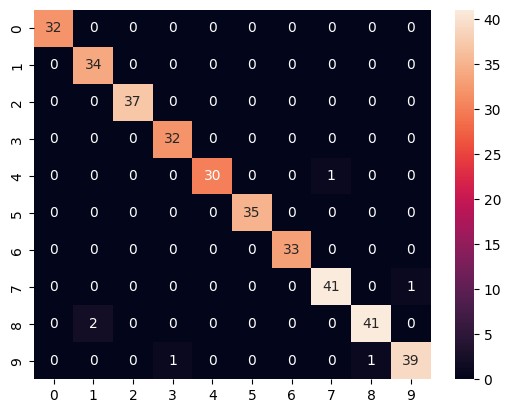

In [14]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Part 4: Hyperparameter Tuning
Determine the optimal value for the hyperparameter $K$ by testing a range of values (e.g., $K=1$ to $K=15$). Plot the test accuracy vs. the value of $K$ to visualize the optimal point.

In [20]:
accuracy_scores = []
for k in range(1,16):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)
  accuracy_scores.append(accuracy)
  print(k, accuracy)

1 0.9833333333333333
2 0.975
3 0.9861111111111112
4 0.9805555555555555
5 0.9833333333333333
6 0.9777777777777777
7 0.9805555555555555
8 0.975
9 0.9722222222222222
10 0.9722222222222222
11 0.9694444444444444
12 0.9694444444444444
13 0.9666666666666667
14 0.9666666666666667
15 0.9638888888888889


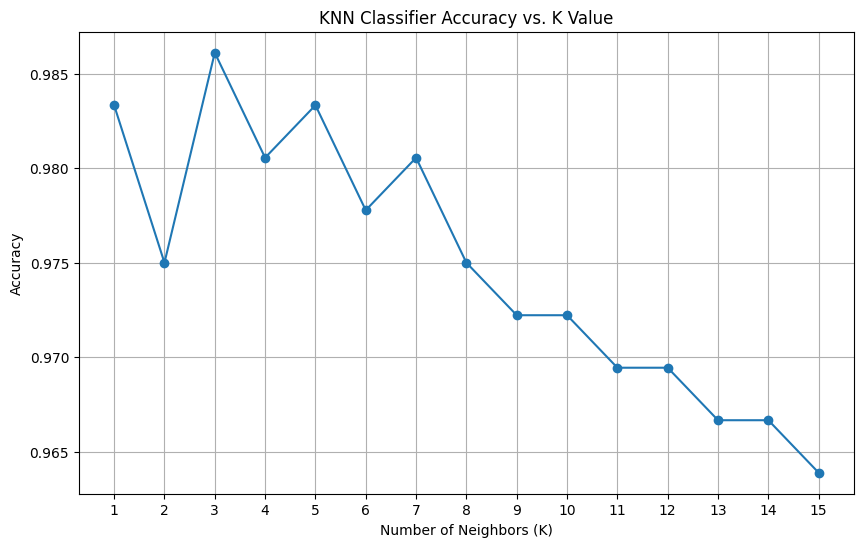

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

## Part 5: Final Analysis

Retrain the final model using the optimal $K$ value found. Generate a confusion matrix and a classification report for the final model on the test set to thoroughly analyze its performance for each digit class.

In [22]:
#Final Model K=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test, predict)
print(accuracy)



0.9861111111111112


In [25]:
cr=classification_report(y_test, predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.94      1.00      0.97        34
           2       1.00      1.00      1.00        37
           3       0.97      1.00      0.98        32
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        33
           7       1.00      0.98      0.99        42
           8       0.98      0.95      0.96        43
           9       0.97      0.95      0.96        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Summary:

### Data Analysis Key Findings

*   The KNN model achieved its highest accuracy of 0.986 for K values ranging from 3 to 5.
*   After K=5, the accuracy generally shows a decreasing trend, with a notable drop to 0.977 at K=6, and further reductions as K increases.

*   A plot visualizing "KNN Classifier Accuracy vs. K Value" was generated, clearly illustrating the relationship between the number of neighbors and the model's performance.

### Insights or Next Steps

*   To identify the optimal K, it is recommended to select the smallest K (e.g., K=3) that achieves the highest accuracy, which in this case is 0.986. This balances model performance with potentially lower computational complexity.
*   Further analysis could involve exploring K values beyond 15 or using cross-validation to get a more robust estimate of accuracy for each K.
